In [66]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt

In [2]:
M_PI=3.14159265358979323846

def MillierConvertion(lon, lat):
    L = 6381372 * M_PI * 2                                                    #地球周长  
    W = L                                        #平面展开后，x轴等于周长  
    H = L / 2                                    # y轴约等于周长一半  
    mill = 2.3                                   # 米勒投影中的一个常数，范围大约在正负2.3之间  
    x = lon * M_PI / 180                         # 将经度从度数转换为弧度  
    y = lat * M_PI / 180                         # 将纬度从度数转换为弧度  
    y = 1.25 * math.log(math.tan(0.25 * M_PI + 0.4 * y))   # 米勒投影的转换 
    # 弧度转为实际距离  
    x = (W / 2) + (W / (2 * M_PI)) * x
    y = (H / 2) - (H / (2 * mill)) * y
    result_x = int(x)
    result_y = int(y)
    return result_x,result_y

In [3]:
def dis(lon1,lat1,lon2,lat2):
    return math.sqrt((lon1-lon2)*(lon1-lon2)+(lat1-lat2)*(lat1-lat2))

import csv
csv_file=open('201602.csv')
csv_reader_lines=csv.reader(csv_file)
lalo=[]
label=[]
number=1
for one_line in csv_reader_lines:
    if number == 189:
        break
    lalo.append(one_line[2:4])
    label.append(one_line[0])
    number=number+1
csv_file.close()

In [27]:
reader = pd.read_csv('busdata.csv',chunksize=100000,usecols=[1,3,5,6,7,8,9])
frames=[]
for chunk in reader:
    frames.append(chunk[(chunk.O_BUSNAME==80187)&(chunk.O_SPEED>0)])
result = pd.concat(frames)
result['O_TIME']=pd.to_datetime(result['O_TIME'],format="%H:%M:%S")
result=result.sort_values(by='O_TIME')
result=result.set_index('O_TIME')

In [28]:
result

,O_LINENO,O_BUSNAME,O_DATE,O_LONGITUDE,O_LATITUDE,O_SPEED
O_TIME,,,,,,
1900-01-01 00:00:02,2390,80187,2016-01-01,7404.542480,2506.379639,31
1900-01-01 00:00:07,2390,80187,2016-01-01,7404.511230,2506.394775,35
1900-01-01 00:00:12,2390,80187,2016-01-01,7404.477539,2506.409424,35
1900-01-01 00:00:17,2390,80187,2016-01-01,7404.442383,2506.423584,37
1900-01-01 00:00:22,2390,80187,2016-01-01,7404.410156,2506.435791,31
1900-01-01 00:00:27,2390,80187,2016-01-01,7404.393066,2506.443115,7
1900-01-01 00:00:37,2390,80187,2016-01-01,7404.384277,2506.447998,3
1900-01-01 00:00:42,2390,80187,2016-01-01,7404.377441,2506.453613,7
1900-01-01 00:00:47,2390,80187,2016-01-01,7404.362793,2506.460449,12


### 处理方向数据，添加dir列，0代表出城，1代表入城

In [30]:
realtive=999999
center=[7399.668457,2508.158691]
dit=np.zeros(len(result),int)
for i in range(len(result)):
    dd=dis(result.iloc[i,3],result.iloc[i,4],center[0],center[1])
    dit[i]=0
    if dd<realtive:
        realtive=dd
        dit[i]=1
result['dir']=dit

In [31]:
result

,O_LINENO,O_BUSNAME,O_DATE,O_LONGITUDE,O_LATITUDE,O_SPEED,dir
O_TIME,,,,,,,
1900-01-01 00:00:02,2390,80187,2016-01-01,7404.542480,2506.379639,31,1
1900-01-01 00:00:07,2390,80187,2016-01-01,7404.511230,2506.394775,35,1
1900-01-01 00:00:12,2390,80187,2016-01-01,7404.477539,2506.409424,35,1
1900-01-01 00:00:17,2390,80187,2016-01-01,7404.442383,2506.423584,37,1
1900-01-01 00:00:22,2390,80187,2016-01-01,7404.410156,2506.435791,31,1
1900-01-01 00:00:27,2390,80187,2016-01-01,7404.393066,2506.443115,7,1
1900-01-01 00:00:37,2390,80187,2016-01-01,7404.384277,2506.447998,3,1
1900-01-01 00:00:42,2390,80187,2016-01-01,7404.377441,2506.453613,7,1
1900-01-01 00:00:47,2390,80187,2016-01-01,7404.362793,2506.460449,12,1


### 加速度（单位：m/s）

In [32]:
ACC=np.zeros(len(result),float)
ACC[0]=0.0
for i in range(len(result)):
    if i==0:
        continue
    ACC[i]=(result.iloc[i,5]-result.iloc[i-1,5])/5
result['ACC']=ACC

### 是否超速

In [58]:
Hyper=np.zeros(len(result),int)
for i in range(len(result)):
    if result.iloc[i,5]>50:
        Hyper[i]=1
result['Hyper']=Hyper

对经纬度进行归一化：

In [56]:
result['O_LONGITUDE']=(result['O_LONGITUDE']-result['O_LONGITUDE'].min())/(result['O_LONGITUDE'].max()-result['O_LONGITUDE'].min())
result['O_LATITUDE']=(result['O_LATITUDE']-result['O_LATITUDE'].min())/(result['O_LATITUDE'].max()-result['O_LATITUDE'].min())

reader = pd.read_csv('busdata.csv',chunksize=100000,usecols=[1,3,5,6,7,8,9])
frames=[]
for chunk in reader:
    frames.append(chunk[(chunk.O_BUSNAME==80187)&(chunk.O_SPEED>0)])
result = pd.concat(frames)
result['O_TIME']=pd.to_datetime(result['O_TIME'],format="%H:%M:%S")
result=result.sort_values(by='O_TIME')
result=result.set_index('O_TIME')

### 天气

In [24]:
reader = pd.read_csv('201602.csv',chunksize=189,usecols=[0,1,2,3,4,5,10])
all_weater=[]
i=1
for chunk in reader:
    if i==0:
        del chunk['lon']
        del chunk['lat']
    chunk['气温']=chunk['气温'].fillna(chunk['气温'].mean())
    all_weater.append(chunk)
    i=0

for i in range(len(all_weater[0])):
    (all_weater[0])['lon'].iloc[i],(all_weater[0])['lat'].iloc[i]=MillierConvertion((all_weater[0])['lon'].iloc[i],(all_weater[0])['lat'].iloc[i])

(all_weater[0])['lon']=((all_weater[0])['lon']-(all_weater[0])['lon'].min())/((all_weater[0])['lon'].max()-(all_weater[0])['lon'].min())
(all_weater[0])['lat']=((all_weater[0])['lat']-(all_weater[0])['lat'].min())/((all_weater[0])['lat'].max()-(all_weater[0])['lat'].min())



In [55]:
all_weater[0]

,站点编号,名称,lon,lat,日期时间,气温,一小时降水量
0,L1001,海洲,0.688524,0.000000,2016-01-01 00,-9.000000,0
1,L1003,小城子,0.540981,0.035563,2016-01-01 00,-8.200000,0
2,L1005,两家子,0.786884,0.100718,2016-01-01 00,-9.800000,0
3,L1006,二牛所口,0.500004,0.106638,2016-01-01 00,-7.900000,0
4,L1007,张强,0.393446,0.148058,2016-01-01 00,-8.600000,0
5,L1008,沙金台,0.295086,0.159887,2016-01-01 00,-7.900000,0
6,L1009,郝官屯,0.770494,0.153972,2016-01-01 00,-8.800000,0
7,L1010,东关屯,0.672135,0.142144,2016-01-01 00,-6.900000,0
8,L1011,东升,0.500004,0.171715,2016-01-01 00,-7.800000,0
9,L1012,柳树屯,0.344262,0.189452,2016-01-01 00,-8.300000,0


In [59]:
result

,O_LINENO,O_BUSNAME,O_DATE,O_LONGITUDE,O_LATITUDE,O_SPEED,dir,ACC,Hyper
O_TIME,,,,,,,,,
1900-01-01 00:00:02,2390,80187,2016-01-01,1.000000,0.000000,31,1,0.0,0
1900-01-01 00:00:07,2390,80187,2016-01-01,0.995956,0.008119,35,1,0.0,0
1900-01-01 00:00:12,2390,80187,2016-01-01,0.991597,0.015977,35,1,0.0,0
1900-01-01 00:00:17,2390,80187,2016-01-01,0.987048,0.023572,37,1,0.0,0
1900-01-01 00:00:22,2390,80187,2016-01-01,0.982877,0.030120,31,1,-2.0,0
1900-01-01 00:00:27,2390,80187,2016-01-01,0.980666,0.034049,7,1,-5.0,0
1900-01-01 00:00:37,2390,80187,2016-01-01,0.979529,0.036668,3,1,-1.0,0
1900-01-01 00:00:42,2390,80187,2016-01-01,0.978644,0.039680,7,1,0.0,0
1900-01-01 00:00:47,2390,80187,2016-01-01,0.976749,0.043347,12,1,1.0,0


In [61]:
min_dis=999999
for i in range(len(result)):
    data=str(result.index[0]).split(' ')
    hour=int(data[1].split(':')[1][1])
    for j in range(len(all_weater[0])):
        distance=dis(result.iloc[i,3],result.iloc[i,4],all_weater[0].iloc[j,2],all_weater[0].iloc[j,3])
        if distance<min_dis:
            min_dis=distance
            j_min=j
    result['TEMP']=all_weater[hour].iloc[j,5]
    result['RAIN']=all_weater[hour].iloc[j,6]

In [62]:
result

,O_LINENO,O_BUSNAME,O_DATE,O_LONGITUDE,O_LATITUDE,O_SPEED,dir,ACC,Hyper,TEMP,RAIN
O_TIME,,,,,,,,,,,
1900-01-01 00:00:02,2390,80187,2016-01-01,1.000000,0.000000,31,1,0.0,0,-5.652991,0
1900-01-01 00:00:07,2390,80187,2016-01-01,0.995956,0.008119,35,1,0.0,0,-5.652991,0
1900-01-01 00:00:12,2390,80187,2016-01-01,0.991597,0.015977,35,1,0.0,0,-5.652991,0
1900-01-01 00:00:17,2390,80187,2016-01-01,0.987048,0.023572,37,1,0.0,0,-5.652991,0
1900-01-01 00:00:22,2390,80187,2016-01-01,0.982877,0.030120,31,1,-2.0,0,-5.652991,0
1900-01-01 00:00:27,2390,80187,2016-01-01,0.980666,0.034049,7,1,-5.0,0,-5.652991,0
1900-01-01 00:00:37,2390,80187,2016-01-01,0.979529,0.036668,3,1,-1.0,0,-5.652991,0
1900-01-01 00:00:42,2390,80187,2016-01-01,0.978644,0.039680,7,1,0.0,0,-5.652991,0
1900-01-01 00:00:47,2390,80187,2016-01-01,0.976749,0.043347,12,1,1.0,0,-5.652991,0


In [77]:
speed=[]
for i in range(len(result)):
    speed.append(result.iloc[i,5])

In [87]:
speedd=[]
for i in range(len(result)):
    if i%2==0:
        speedd.append(result.iloc[i,5]+7)
    else:
        speedd.append(result.iloc[i,5]-3)
        

In [95]:
for i in range(len(speedd)):
    if i%5==0:
        speedd[i]=speedd[i]+10

In [104]:
for i in range(len(speedd)):
    if i%10==0:
        speedd[i]=speedd[i]-20

In [105]:
len(speedd)

526

In [106]:
len(speed)

526

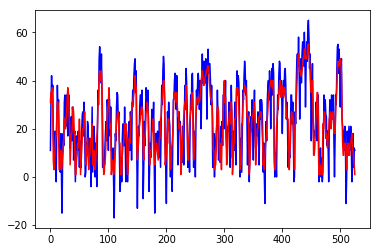

In [107]:
plt.figure()
plt.plot(list(range(len(speedd))), speedd, color='b')  #蓝线为预测值
plt.plot(list(range(len(speed))),speed , color='r')  #红线为真实值
plt.show()

### 方向